# Plot results

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
def extract_prediction_accuracy(prediction_file_names, target_file_names, num_samples, num_epochs, num_inputs):#, csv_filename):
    accuracies = []

    for prediction_file_name, target_file_name in zip(prediction_file_names, target_file_names):
        predictions = pd.read_csv(prediction_file_name)
        targets = pd.read_csv(target_file_name)
        data = pd.DataFrame(np.insert(predictions.to_numpy(), 3,
                                      np.tile(targets["target"].to_numpy().reshape(num_samples, num_inputs), num_epochs).reshape(-1), axis=1),
                                      columns=["sampling", "epoch", "prediction", "target"])
        data["prediction"] = np.sign(data["prediction"])
        data.loc[data["prediction"] == -1.0, "prediction"] = 0.0
        data["prediction"] = data["prediction"] == data["target"]

        #grouped = data[["sampling", "epoch", "prediction"]].groupby(["sampling", "epoch"]).mean()
        #print(grouped.head())  # See the grouped mean accuracy for a few entries

        accuracies.append(data[["sampling", "epoch", "prediction"]].groupby(["sampling", "epoch"]).\
                                                                    mean().to_numpy().reshape(num_samples, num_epochs))
        
        combined_df = pd.DataFrame({"Epoch": list(range(num_epochs))})
        
        # First add all means
        for i, data in enumerate(accuracies):
            model_id = f"Model{i+1}"
            means = data.mean(axis=0)
            #print(f"Means for Model {i+1}:", means)
            combined_df[f"{model_id}_Mean"] = data.mean(axis=0)

        # Then add all errors (and sanitize)
        for i, data in enumerate(accuracies):
            model_id = f"Model{i+1}"
            errors = data.std(axis=0)

            errors = data.std(axis=0)
            #print(f"Errors for Model {i+1}:", errors)

            # Optional: Replace absurdly large values or NaNs with 0 or np.nan
            #errors = np.where((errors > 1e2) | ~np.isfinite(errors), np.nan, errors)

            combined_df[f"{model_id}_Error"] = errors

        # Check the final table for outliers before exporting
        outliers = combined_df[combined_df.filter(like='_Mean').gt(1).any(axis=1)]
        if not outliers.empty:
            print("⚠️ Outliers in mean values detected:")
            print(outliers)

        combined_df = combined_df.rename(columns={
        'Model1_Mean': 'Sn_Mean',
        'Model1_Error': 'Sn_Error',
        'Model2_Mean': 'entanglement_Mean',
        'Model2_Error': 'entanglement_Error',
        'Model3_Mean': 'Energy_Mean',
        'Model3_Error': 'Energy_Error',
        'Model4_Mean': 'free_parameters_Mean',
        'Model4_Error': 'free_parameters_Error'
        })
            
        #combined_df.to_csv(csv_filename)

    return accuracies



def plot_graph(graph_name, accuracies, num_epochs):
    _, ax = plt.subplots(figsize=(7, 4))
    colors = [
        (100/255, 143/255, 255/255),
        (120/255, 94/255, 240/255),
        (220/255, 38/255, 127/255),
        (254/255, 97/255, 0/255),
        (255/255, 176/255, 0/255),
        (255/255, 176/255, 120/255),
    ]

    for data, color in zip(accuracies, colors):
        ax.errorbar(x=list(range(num_epochs)),
                    y=data.mean(axis=0),
                    yerr=data.std(axis=0),
                    fmt="-o", markersize=3, capsize=3,
                    color=color,
                    ecolor=(*color, 0.3))
        

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Average test accuracy")
    plt.legend(["Sn (72 parameters)", "Entanglement circuit (72 paramenters)", "Energy (72 parameters)", "Sn free parameters (88 parameters)"])
    plt.grid()
    plt.title(graph_name)
    plt.show()


## Connected/Disconnected Graphs

In [ ]:
target_file_names = [
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/graph_connectedness/GNTestOwn-Sn_circuit-8-120-sampling_10-epochs_50-targets-test-1.csv",
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/graph_connectedness/GNTestOwn-Cn_circuit-8-120-sampling_10-epochs_50-targets-test-0.csv",
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/graph_connectedness/GNTestOwn-entanglement_circuit-8-120-sampling_10-epochs_50-targets-test-0.csv",
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/graph_connectedness/GNTestOwn-Sn_free_parameter_circuit-8-132-sampling_10-epochs_50-targets-test-0.csv",
]
prediction_file_names = [
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/graph_connectedness/GNTestOwn-Sn_circuit-8-120-sampling_10-epochs_50-predictions-test-1.csv",
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/graph_connectedness/GNTestOwn-Cn_circuit-8-120-sampling_10-epochs_50-predictions-test-0.csv",
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/graph_connectedness/GNTestOwn-entanglement_circuit-8-120-sampling_10-epochs_50-predictions-test-0.csv",
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/graph_connectedness/GNTestOwn-Sn_free_parameter_circuit-8-132-sampling_10-epochs_50-predictions-test-0.csv",
]

In [34]:
num_samples = 10
num_epochs = 51
num_inputs = 2900

accuracies = extract_prediction_accuracy(prediction_file_names, target_file_names, num_samples, num_epochs, num_inputs)

(1479000, 3)
(1479000, 3)
(1479000, 3)
(1479000, 3)


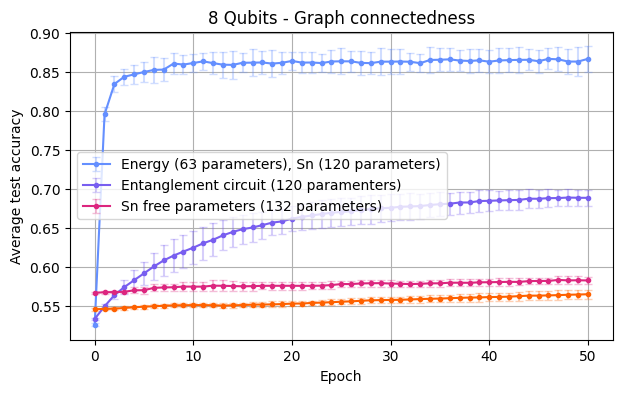

In [35]:
plot_graph("8 Qubits - Graph connectedness", accuracies, num_epochs)

## Hamiltonian

In [36]:
target_file_names = [
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Hamiltonian-Sn_circuit-8-120-sampling_10-epochs_50-targets-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Hamiltonian-Cn_circuit-8-120-sampling_10-epochs_50-targets-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Hamiltonian-entanglement_circuit-8-120-sampling_10-epochs_50-targets-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Hamiltonian-Sn_free_parameter_circuit-8-132-sampling_10-epochs_50-targets-test-0.csv",
]
prediction_file_names = [
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Hamiltonian-Sn_circuit-8-120-sampling_10-epochs_50-predictions-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Hamiltonian-Cn_circuit-8-120-sampling_10-epochs_50-predictions-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Hamiltonian-entanglement_circuit-8-120-sampling_10-epochs_50-predictions-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Hamiltonian-Sn_free_parameter_circuit-8-132-sampling_10-epochs_50-predictions-test-0.csv",
]

In [37]:
num_samples = 10
num_epochs = 51
num_inputs = 2900

accuracies = extract_prediction_accuracy(prediction_file_names, target_file_names, num_samples, num_epochs, num_inputs)

(1479000, 3)
(1479000, 3)
(1479000, 3)
(1479000, 3)


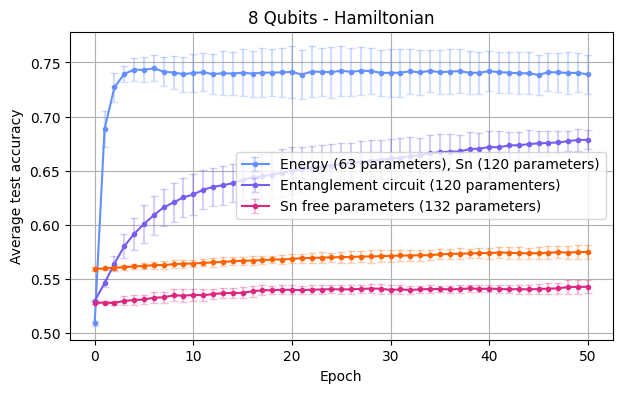

In [38]:
plot_graph("8 Qubits - Hamiltonian", accuracies, num_epochs)

## Bipartite

In [157]:
target_file_names = [
    "/Users/home/qiskit_env/Pennylane/output/bipartite/Bipartite_test_test-Sn_circuit-6-60-sampling_5-epochs_30-targets-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/bipartite/Bipartite_test_test-entanglement_circuit-6-60-sampling_5-epochs_30-targets-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/bipartite/Bipartite_test_test-Energy_circuit-6-63-sampling_5-epochs_30-targets-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/bipartite/Bipartite_test_test-Sn_free_parameter_circuit-6-54-sampling_5-epochs_30-targets-test-0.csv",
]
prediction_file_names = [
    "/Users/home/qiskit_env/Pennylane/output/bipartite/Bipartite_test_test-Sn_circuit-6-60-sampling_5-epochs_30-predictions-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/bipartite/Bipartite_test_test-entanglement_circuit-6-60-sampling_5-epochs_30-predictions-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/bipartite/Bipartite_test_test-Energy_circuit-6-63-sampling_5-epochs_30-predictions-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/bipartite/Bipartite_test_test-Sn_free_parameter_circuit-6-54-sampling_5-epochs_30-predictions-test-0.csv",
]


In [158]:
num_samples = 5
num_epochs = 31 # always n+1
num_inputs = 2900

accuracies = extract_prediction_accuracy(prediction_file_names, target_file_names, num_samples, num_epochs, num_inputs)

Means for Model 1: [0.642      0.75096552 0.80482759 0.80737931 0.8222069  0.81482759
 0.81744828 0.82524138 0.82082759 0.81531034 0.82703448 0.82731034
 0.82206897 0.82855172 0.82751724 0.83434483 0.82758621 0.82944828
 0.82696552 0.82537931 0.82813793 0.82641379 0.82606897 0.82634483
 0.82772414 0.82710345 0.82227586 0.82848276 0.81806897 0.82868966
 0.82668966]
Errors for Model 1: [0.00109913 0.02584358 0.01906993 0.01082912 0.0165813  0.01686908
 0.02092578 0.01869131 0.01719663 0.02010744 0.02815838 0.02148627
 0.02000951 0.01713817 0.00973709 0.01279603 0.01691273 0.01005478
 0.0149345  0.00682933 0.00821414 0.00691927 0.00821414 0.00433222
 0.01247799 0.00666008 0.00510345 0.00568537 0.00271167 0.00742269
 0.01028165]
Means for Model 1: [0.642      0.75096552 0.80482759 0.80737931 0.8222069  0.81482759
 0.81744828 0.82524138 0.82082759 0.81531034 0.82703448 0.82731034
 0.82206897 0.82855172 0.82751724 0.83434483 0.82758621 0.82944828
 0.82696552 0.82537931 0.82813793 0.82641379 

Traceback (most recent call last):
  File "/Users/home/.vscode/extensions/ms-python.python-2025.2.0-darwin-arm64/python_files/python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    !pwd
    ^
SyntaxError: invalid syntax



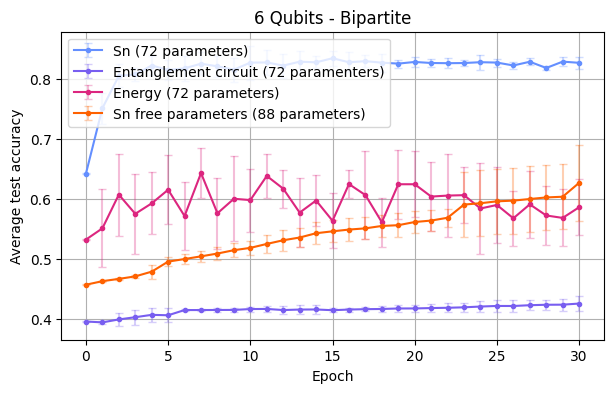

In [159]:
plot_graph("6 Qubits - Bipartite", accuracies, num_epochs)

## Connected + Bipartite

In [49]:
target_file_names = [
    "/Users/home/qiskit_env/Pennylane/output/connected_plus_bipartite/Connected_plus_Bipartite-Sn_circuit-8-120-sampling_10-epochs_50-targets-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/connected_plus_bipartite/Connected_plus_Bipartite-Cn_circuit-8-120-sampling_10-epochs_50-targets-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/connected_plus_bipartite/Connected_plus_Bipartite-entanglement_circuit-8-120-sampling_10-epochs_50-targets-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/connected_plus_bipartite/Connected_plus_Bipartite-Sn_free_parameter_circuit-8-132-sampling_10-epochs_50-targets-test-0.csv",
]
prediction_file_names = [
    "/Users/home/qiskit_env/Pennylane/output/connected_plus_bipartite/Connected_plus_Bipartite-Sn_circuit-8-120-sampling_10-epochs_50-predictions-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/connected_plus_bipartite/Connected_plus_Bipartite-Cn_circuit-8-120-sampling_10-epochs_50-predictions-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/connected_plus_bipartite/Connected_plus_Bipartite-entanglement_circuit-8-120-sampling_10-epochs_50-predictions-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/connected_plus_bipartite/Connected_plus_Bipartite-Sn_free_parameter_circuit-8-132-sampling_10-epochs_50-predictions-test-0.csv",
]

In [50]:
num_samples = 10
num_epochs = 51 # always n+1
num_inputs = 2900

accuracies = extract_prediction_accuracy(prediction_file_names, target_file_names, num_samples, num_epochs, num_inputs)

         sampling  epoch  prediction
0               0      0   -0.020275
1               0      0   -0.285279
2               0      0    0.096293
3               0      0   -0.067824
4               0      0    0.044618
...           ...    ...         ...
1478995         9     50   -0.148202
1478996         9     50    0.132412
1478997         9     50    0.427936
1478998         9     50    0.073948
1478999         9     50    0.191306

[1479000 rows x 3 columns]
         sampling  epoch  prediction
0               0      0   -0.041143
1               0      0   -0.005202
2               0      0   -0.027173
3               0      0   -0.009934
4               0      0    0.000234
...           ...    ...         ...
1478995         9     50    0.050821
1478996         9     50   -0.054243
1478997         9     50   -0.014218
1478998         9     50    0.113886
1478999         9     50   -0.024394

[1479000 rows x 3 columns]
         sampling  epoch    prediction
0               0

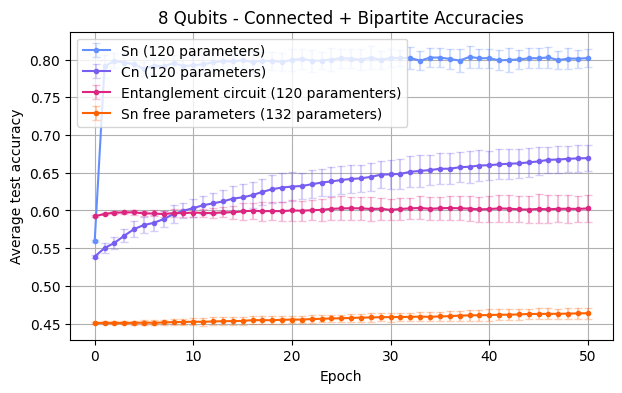

In [120]:
plot_graph("8 Qubits - Connected + Bipartite Accuracies", accuracies, num_epochs)

## Hamiltonian Cycle

In [69]:
target_file_names = [
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Ham_cycle-Sn_circuit-8-120-sampling_10-epochs_50-targets-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Ham_cycle-Cn_circuit-8-120-sampling_10-epochs_50-targets-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Ham_cycle-entanglement_circuit-8-120-sampling_10-epochs_50-targets-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Ham_cycle-Sn_free_parameter_circuit-8-132-sampling_10-epochs_50-targets-test-0.csv",
]
prediction_file_names = [
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Ham_cycle-Sn_circuit-8-120-sampling_10-epochs_50-predictions-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Ham_cycle-Cn_circuit-8-120-sampling_10-epochs_50-predictions-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Ham_cycle-entanglement_circuit-8-120-sampling_10-epochs_50-predictions-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Ham_cycle-Sn_free_parameter_circuit-8-132-sampling_10-epochs_50-predictions-test-0.csv",
]
csv_filename = "/Users/home/qiskit_env/Pennylane/output/hamiltonian/Grouped-Ham_Cycle-s_10-e_50.csv"

In [70]:
num_samples = 10
num_epochs = 51 # always n+1
num_inputs = 2900

accuracies = extract_prediction_accuracy(prediction_file_names, target_file_names, csv_filename, num_samples, num_epochs, num_inputs)

Means for Model 1: [0.54282759 0.68993103 0.72472414 0.7377931  0.73927586 0.74241379
 0.74389655 0.74396552 0.746      0.74624138 0.74565517 0.74624138
 0.74693103 0.745      0.7452069  0.74544828 0.74662069 0.74644828
 0.74637931 0.74731034 0.748      0.74734483 0.74672414 0.74751724
 0.74689655 0.74765517 0.74748276 0.74593103 0.74593103 0.74582759
 0.74527586 0.74437931 0.74555172 0.74489655 0.7437931  0.74427586
 0.74424138 0.74334483 0.74513793 0.74441379 0.74351724 0.74527586
 0.7447931  0.74537931 0.74496552 0.74427586 0.74272414 0.74365517
 0.74355172 0.74341379 0.74289655]
Errors for Model 1: [0.00151724 0.01416801 0.01896618 0.0178807  0.01542459 0.01618561
 0.01605064 0.01732548 0.02031453 0.01978749 0.01978012 0.02240979
 0.02133669 0.0212601  0.02163169 0.02193808 0.02270254 0.02238037
 0.02248807 0.02139421 0.02249365 0.0210588  0.02121643 0.02098853
 0.02111685 0.02080074 0.02262345 0.020651   0.02116399 0.0200543
 0.02010913 0.01930853 0.01905774 0.01925411 0.01830187 

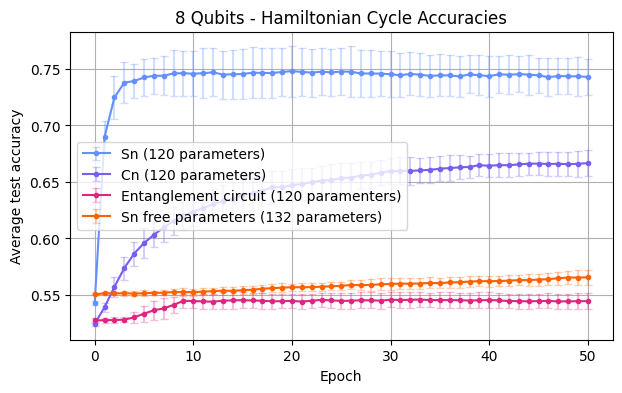

In [ ]:
plot_graph("8 Qubits - Hamiltonian Cycle Accuracies", accuracies, num_epochs)

In [137]:
target_file_names = [
    "/Users/home/qiskit_env/Pennylane/output/max_clique/Max_clique-Sn_circuit-8-72-sampling_10-epochs_50-targets-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/max_clique/Max_clique-entanglement_circuit-8-72-sampling_10-epochs_50-targets-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/max_clique/Max_clique-Energy_circuit-8-72-sampling_10-epochs_50-targets-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/max_clique/Max_clique-Sn_free_parameter_circuit-8-88-sampling_10-epochs_50-targets-test-0.csv"
]
prediction_file_names = [
    "/Users/home/qiskit_env/Pennylane/output/max_clique/Max_clique-Sn_circuit-8-72-sampling_10-epochs_50-predictions-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/max_clique/Max_clique-entanglement_circuit-8-72-sampling_10-epochs_50-predictions-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/max_clique/Max_clique-Energy_circuit-8-72-sampling_10-epochs_50-predictions-test-1.csv",
    "/Users/home/qiskit_env/Pennylane/output/max_clique/Max_clique-Sn_free_parameter_circuit-8-88-sampling_10-epochs_50-predictions-test-0.csv"
]
csv_filename = "/Users/home/qiskit_env/Pennylane/output/max_clique/Grouped-3-clique-s_10-e_50-q_8.csv"

In [138]:
num_samples = 10
num_epochs = 51 # always n+1
num_inputs = 2900

accuracies = extract_prediction_accuracy(prediction_file_names, target_file_names, num_samples, num_epochs, num_inputs, csv_filename)

Means for Model 1: [0.52672414 0.69131034 0.70817241 0.71210345 0.71448276 0.71575862
 0.71875862 0.72106897 0.72237931 0.72513793 0.7282069  0.72848276
 0.72965517 0.73441379 0.73458621 0.73703448 0.73655172 0.73551724
 0.73858621 0.73958621 0.73893103 0.74041379 0.74162069 0.74327586
 0.74113793 0.74155172 0.74113793 0.74331034 0.74241379 0.74424138
 0.74437931 0.74427586 0.74568966 0.74675862 0.74441379 0.74644828
 0.74813793 0.74906897 0.74941379 0.74944828 0.7487931  0.75093103
 0.74906897 0.74993103 0.75044828 0.75196552 0.75255172 0.75148276
 0.75231034 0.75358621 0.75444828]
Errors for Model 1: [0.00216584 0.00881141 0.00747258 0.00786547 0.00920502 0.00914417
 0.0096628  0.00822752 0.01152204 0.01068348 0.00845046 0.00915217
 0.0138327  0.0121297  0.01267545 0.01298604 0.00978606 0.01321549
 0.01136933 0.01273605 0.01309569 0.01457915 0.01248452 0.01357084
 0.01403075 0.01376139 0.01378797 0.01312177 0.01292897 0.01336406
 0.01333467 0.01337664 0.01343434 0.0127951  0.01327994

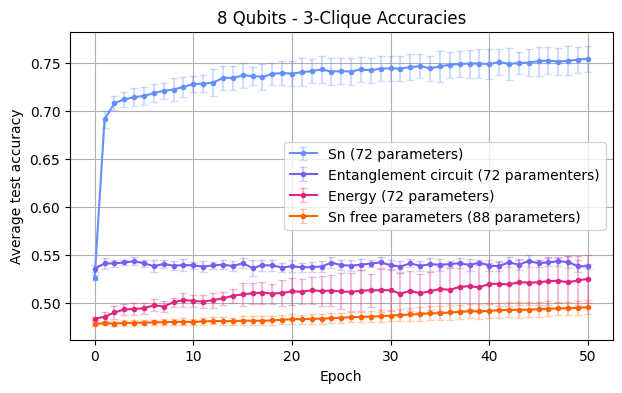

In [ ]:
plot_graph("8 Qubits - 3-Clique Accuracies", accuracies, num_epochs)

## Clique Supervised

In [337]:
import ast

def extract_prediction_accuracy_per_qubit(prediction_file_names, target_file_names, num_samples, num_epochs, num_inputs, num_nodes):
    accuracies = []
    average_labels = []

    for prediction_file_name, target_file_name in zip(prediction_file_names, target_file_names):
        predictions = pd.read_csv(prediction_file_name)
        targets = pd.read_csv(target_file_name)

        targets_smaller = targets.drop(columns = ['sampling'])

        chunks = [targets_smaller.iloc[i * num_inputs: (i + 1) * num_inputs] for i in range(num_samples)]
        repeated_chunks = []
        for chunk in chunks:
            repeated_chunks.append(pd.concat([chunk] * num_epochs, ignore_index=True))
        targets_repeated = pd.concat(repeated_chunks, ignore_index=True)

        print('Predictions shape: ', predictions.shape)
        print('Targets shape: ', targets_repeated.shape) 

        joined_table = predictions.join(targets_repeated)

        joined_table['prediction'] = joined_table['prediction'].apply(lambda x: x if isinstance(x, list) else eval(x))
        joined_table['target'] = joined_table['target'].apply(lambda x: x if isinstance(x, list) else eval(x))
        
        pred_split = pd.DataFrame(joined_table['prediction'].to_list(), columns=[f'prediction_{i+1}' for i in range(num_nodes)])
        joined_table = pd.concat([joined_table.drop(columns=['prediction']), pred_split], axis=1)

        target_split = pd.DataFrame(joined_table['target'].to_list(), columns=[f'target_{i+1}' for i in range(num_nodes)])
        joined_table = pd.concat([joined_table.drop(columns=['target']), target_split], axis=1)


        node_accuracies = []

        for i in range(1, num_nodes + 1):
            pred_col = f"prediction_{i}"
            target_col = f"target_{i}"

            joined_table[pred_col] = np.sign(joined_table[pred_col])
            joined_table.loc[joined_table[pred_col] == -1.0, pred_col] = 0.0
    
            joined_table["correct"] = joined_table[pred_col] == joined_table[target_col]
    
            grouped = joined_table[["sampling", "epoch", "correct"]].groupby(["sampling", "epoch"]).mean()
            accuracy_matrix = grouped.to_numpy().reshape(num_samples, num_epochs)
            node_accuracies.append(accuracy_matrix)

            # Average label for coloring later
            avg_label = joined_table[target_col].mean()
            average_labels.append(avg_label)
            print(average_labels)

        accuracies = np.stack(node_accuracies, axis=0)

        combined_df = pd.DataFrame({"Epoch": list(range(num_epochs))})

        for i, data in enumerate(accuracies):
            combined_df[f"Node{i+1}_Mean"] = data.mean(axis=0)
            combined_df[f"Node{i+1}_Error"] = data.std(axis=0)

        combined_df.to_csv("accuracies_per_node.csv", index=False)

    return accuracies, average_labels



def plot_graph(graph_name, accuracies, num_epochs, average_labels):
    _, ax = plt.subplots(figsize=(12, 8))

    color_palette = ['blue', 'orange', 'green', 'purple', 'brown', 'pink', 'red', 'cyan', 'black', 'yellow']
    labels = [f"Qubit {i+1}" for i in range(len(accuracies))]

    epochs = list(range(num_epochs))
    fat_epochs = list(range(0, num_epochs, 5))

    for i, (data, label) in enumerate(zip(accuracies, labels)):
        color = color_palette[i % len(color_palette)]
        means = data.mean(axis=0)
        stds = data.std(axis=0)

        ax.plot(epochs, means, '-o', markersize=3, label=label, color=color)
        ax.errorbar(epochs, means, yerr=stds, fmt='none', capsize=3, alpha=0.3, color=color)
        ax.plot(fat_epochs, means[::5], 'o', markersize=6, color=color)

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Average test accuracy")
    ax.set_title(graph_name)
    ax.legend(title="Qubit Index")
    ax.grid(True)
    plt.tight_layout()
    plt.show()

In [348]:
import ast

def extract_prediction_accuracy_per_qubit(prediction_file_names, target_file_names, num_samples, num_epochs, num_inputs, num_nodes):
    accuracies = []

    for prediction_file_name, target_file_name in zip(prediction_file_names, target_file_names):
        predictions = pd.read_csv(prediction_file_name)
        targets = pd.read_csv(target_file_name)

        targets_smaller = targets.drop(columns = ['sampling'])

        chunks = [targets_smaller.iloc[i * num_inputs: (i + 1) * num_inputs] for i in range(num_samples)]
        repeated_chunks = []
        for chunk in chunks:
            repeated_chunks.append(pd.concat([chunk] * num_epochs, ignore_index=True))
        targets_repeated = pd.concat(repeated_chunks, ignore_index=True)

        print('Predictions shape: ', predictions.shape)
        print('Targets shape: ', targets_repeated.shape) 

        joined_table = predictions.join(targets_repeated)

        joined_table['prediction'] = joined_table['prediction'].apply(lambda x: x if isinstance(x, list) else eval(x))
        joined_table['target'] = joined_table['target'].apply(lambda x: x if isinstance(x, list) else eval(x))
        
        pred_split = pd.DataFrame(joined_table['prediction'].to_list(), columns=[f'prediction_{i+1}' for i in range(num_nodes)])
        joined_table = pd.concat([joined_table.drop(columns=['prediction']), pred_split], axis=1)

        target_split = pd.DataFrame(joined_table['target'].to_list(), columns=[f'target_{i+1}' for i in range(num_nodes)])
        joined_table = pd.concat([joined_table.drop(columns=['target']), target_split], axis=1)


        node_accuracies = []

        for i in range(1, num_nodes + 1):
            pred_col = f"prediction_{i}"
            target_col = f"target_{i}"

            joined_table[pred_col] = np.sign(joined_table[pred_col])
            joined_table.loc[joined_table[pred_col] == -1.0, pred_col] = 0.0
    
            joined_table["correct"] = joined_table[pred_col] == joined_table[target_col]
    
            grouped = joined_table[["sampling", "epoch", "correct"]].groupby(["sampling", "epoch"]).mean()
            accuracy_matrix = grouped.to_numpy().reshape(num_samples, num_epochs)
            node_accuracies.append(accuracy_matrix)

        accuracies = np.stack(node_accuracies, axis=0)

        combined_df = pd.DataFrame({"Epoch": list(range(num_epochs))})

        for i, data in enumerate(accuracies):
            combined_df[f"Node{i+1}_Mean"] = data.mean(axis=0)
            combined_df[f"Node{i+1}_Error"] = data.std(axis=0)


        node_cols = [f'Node{i}_Mean' for i in range(1, num_nodes + 1)] 
        combined_df['Node_Avg'] = combined_df[node_cols].mean(axis=1)
        combined_df.drop(columns=node_cols, inplace=True)

        node_cols_error = [f'Node{i}_Error' for i in range(1, num_nodes + 1)]
        combined_df['Node_Avg_Error'] = combined_df[node_cols_error].mean(axis=1)
        combined_df.drop(columns=node_cols_error, inplace=True)

        combined_df.to_csv("accuracies_per_node.csv", index=False)

        print(combined_df.head())  # Check the first few rows of the combined DataFrame

    return combined_df



def plot_graph(graph_name, accuracy_dataframe, num_epochs):
    _, ax = plt.subplots(figsize=(12, 8))

    color = 'blue'

    epochs = list(range(num_epochs))
    fat_epochs = list(range(0, num_epochs, 5))

    means = accuracy_dataframe['Node_Avg']
    stds = accuracy_dataframe['Node_Avg_Error']

    ax.plot(epochs, means, '-o', markersize=3, label="Average", color=color)
    ax.errorbar(epochs, means, yerr=stds, fmt='none', capsize=3, alpha=0.3, color=color)
    ax.plot(fat_epochs, means.iloc[::5], 'o', markersize=6, color=color)

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Average test accuracy")
    ax.set_title(graph_name)
    ax.legend(title="Average Accuracy")
    ax.grid(True)
    plt.tight_layout()
    plt.show()

In [349]:
target_file_names = [
    #"/Users/home/qiskit_env/Pennylane/output/clique_supervised/Clique_supervised-Sn_circuit-10-60-sampling_5-epochs_50-targets-test-1.csv",
    #"/Users/home/qiskit_env/Pennylane/output/clique_supervised/Clique_supervised-entanglement_circuit-10-60-sampling_5-epochs_50-targets-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/clique_supervised/Clique_supervised-Cn_circuit-8-120-sampling_1-epochs_200-targets-test-0.csv"
]
prediction_file_names = [
    #"/Users/home/qiskit_env/Pennylane/output/clique_supervised/Clique_supervised-Sn_circuit-10-60-sampling_5-epochs_50-predictions-test-1.csv",
    #"/Users/home/qiskit_env/Pennylane/output/clique_supervised/Clique_supervised-entanglement_circuit-10-60-sampling_5-epochs_50-predictions-test-0.csv",
    "/Users/home/qiskit_env/Pennylane/output/clique_supervised/Clique_supervised-Cn_circuit-8-120-sampling_1-epochs_200-predictions-test-0.csv"
]
#csv_filename = "/Users/home/qiskit_env/Pennylane/output/clique_supervised/Grouped-3-clique_supervised-s_10-e_50-q_6.csv"

In [350]:
num_samples = 1
num_epochs = 201 # always n+1
num_inputs = 2900
num_nodes = 8

accuracies = extract_prediction_accuracy_per_qubit(prediction_file_names, target_file_names, num_samples, num_epochs, num_inputs, num_nodes)

Predictions shape:  (582900, 3)
Targets shape:  (582900, 1)
   Epoch  Node_Avg  Node_Avg_Error
0      0  0.512328             0.0
1      1  0.515345             0.0
2      2  0.518664             0.0
3      3  0.521034             0.0
4      4  0.525172             0.0


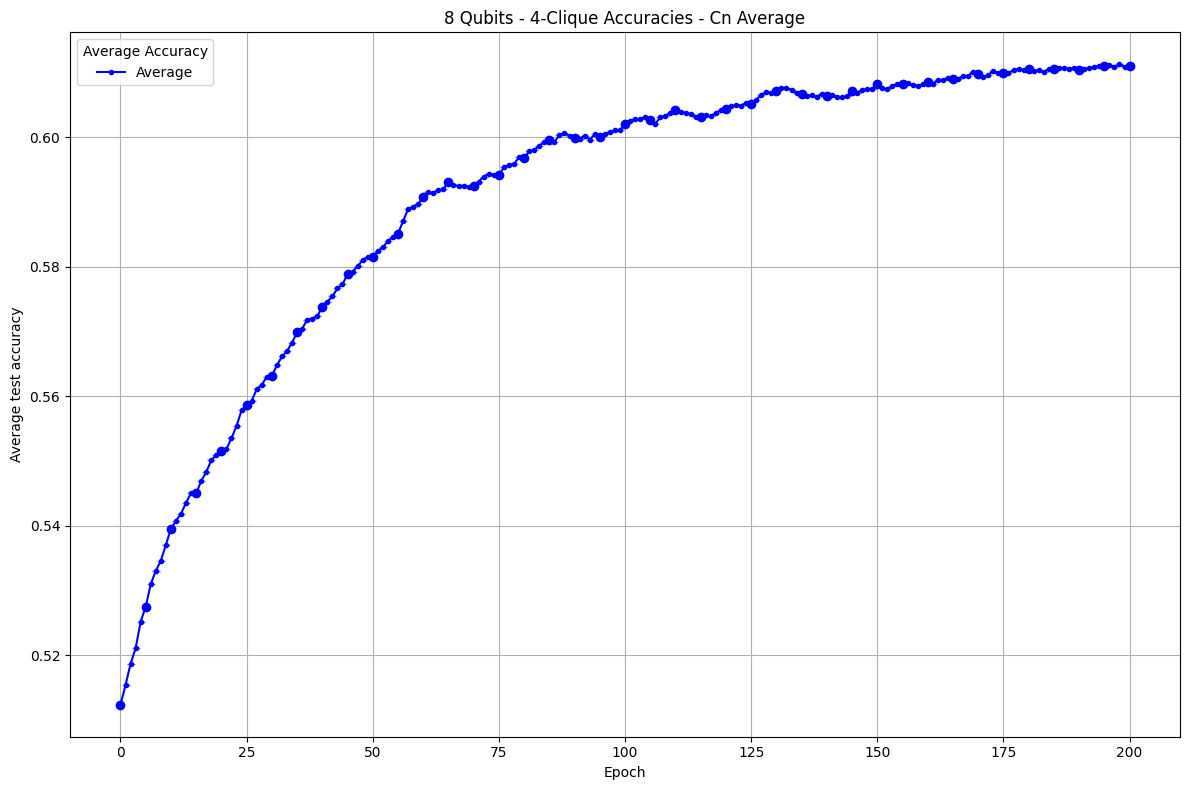

In [355]:
plot_graph("8 Qubits - 4-Clique Accuracies - Cn Average", accuracies, num_epochs)

## Max Cut

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

In [ ]:
def predicted_cut_value(prediction_file_names, num_samples, num_epochs, num_inputs, num_nodes):
    approx_rates = []
    approx_rates_sample = []

    for prediction_file_name in prediction_file_names:

        predictions = pd.read_csv(prediction_file_name)
        
        #predictions['prediction'] = predictions['prediction'].apply(lambda x: x if isinstance(x, list) else eval(x))
        #predictions['prediction'] = predictions['prediction'].apply(lambda list: [float(np.sign(x)) for x in list]) 

        # Deal with 2 apply's in one:
        predictions['prediction'] = predictions['prediction'].apply(lambda x: [float(np.sign(y)) for y in (eval(x) if not isinstance(x, list) else x)])
        predictions['adjacency'] = predictions['adjacency'].apply(ast.literal_eval)


        for k in range(num_inputs * num_samples * num_epochs):
            cut_values = []
            adj_matrix = np.array(predictions['adjacency'][k]).reshape(num_nodes, num_nodes)
            cut_value = 0
            for i in range(num_nodes):
                for j in range(num_nodes):
                    if adj_matrix[i][j] == 1 and predictions['prediction'][k][i] != predictions['prediction'][k][j]:
                        cut_value += 1

            #predictions.at[k, 'cut_value'] = cut_value/2

            #Optimize the cut value column generation:
            #cut_values.append(cut_value/2)
            # ...

            # Other option: leave out generatin 'cut_value' column altogether!

            approx_rates_sample.append((cut_value/2)/predictions['max_cut'][k])

            if (k+1) % (num_epochs * num_inputs) == 0:
                approx_rate_sample_reshaped = np.array(approx_rates_sample).reshape(num_epochs, num_inputs)
                mean_approx_rates = approx_rate_sample_reshaped.mean(axis = 1)

                approx_rates.append(mean_approx_rates)
                approx_rates_sample = []

        #predictions.to_csv('Preliminary_JOIN.csv')   
        
        return approx_rates
    


def plot_graph(graph_name, approx_rates, num_epochs):
    
    # Here: OPTIMIZE the mean calculation! (Later)
    approx_samples = np.array(approx_rates)
    means = approx_samples.mean(axis=0)  
    stds = approx_samples.std(axis=0) 

    _, ax = plt.subplots(figsize=(12, 8))
    color = 'blue'

    epochs = list(range(num_epochs))
    fat_epochs = list(range(0, num_epochs, 5))

    ax.plot(epochs, means, '-o', markersize=3, label="Average", color=color)
    ax.errorbar(epochs, means, yerr=stds, fmt='none', capsize=3, alpha=0.3, color=color)
    ax.plot(fat_epochs, means[::5], 'o', markersize=6, color=color)

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Average test accuracy")
    ax.set_title(graph_name)
    ax.legend(title="Average Accuracy")
    ax.grid(True)
    plt.tight_layout()
    plt.show()



In [8]:
prediction_file_names = [
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/max_cut/Max_Cut-Sn_circuit-6-60-sampling_5-epochs_5-predictions-test-1.csv",
    #"/Users/home/Quantum_Computing/Pennylane/Graph_Machine_Learning/max_cut/Max_Cut-entanglement_circuit-6-120-sampling_5-epochs_150-predictions-test-0.csv",
    #"/Users/home/Quantum_Computing/Pennylane/Graph_Machine_Learning/output/max_cut/Max_Cut-Cn_circuit-6-60-sampling_5-epochs_150-predictions-test-0.csv",
]

In [9]:
num_samples = 5
num_epochs = 6 # always n+1
num_inputs = 2900
num_nodes = 6

mean_approx_rates = predicted_cut_value(prediction_file_names, num_samples, num_epochs, num_inputs, num_nodes)

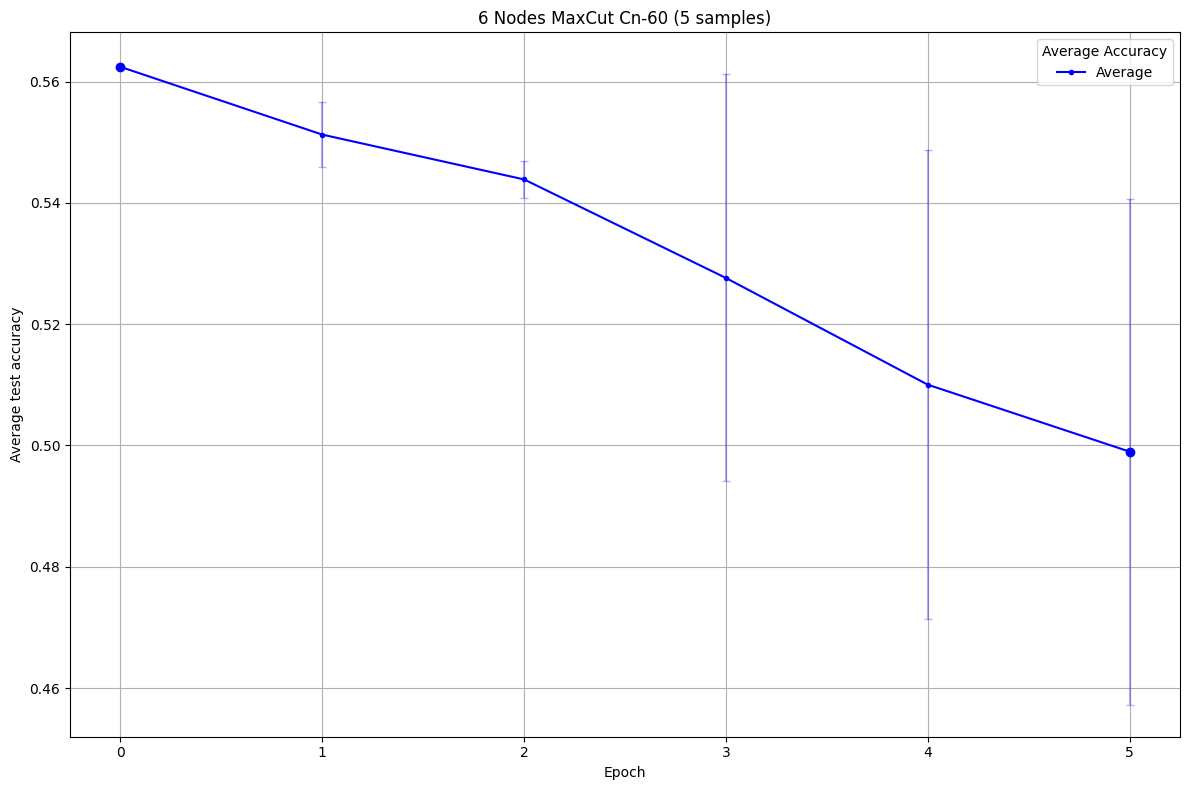

In [ ]:
plot_graph("6 Nodes MaxCut Cn-60 (5 samples)", mean_approx_rates, num_epochs)

## Subgraph Problem


In [19]:
target_file_names = [
    #"/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/subgraph/GNTestOwn-Sn_circuit-8-120-sampling_10-epochs_50-targets-test-1.csv",
    #"/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/subgraph/GNTestOwn-Cn_circuit-8-120-sampling_10-epochs_50-targets-test-0.csv",
    #"/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/subgraph/GNTestOwn-entanglement_circuit-8-120-sampling_10-epochs_50-targets-test-0.csv",
    #"/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/subgraph/GNTestOwn-Sn_free_parameter_circuit-8-132-sampling_10-epochs_50-targets-test-0.csv",
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/subgraph/Subgraph-Subgraph_circuit-6-8-sampling_5-epochs_50-targets-test-0.csv"
]
prediction_file_names = [
    #"/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/subgraph/GNTestOwn-Sn_circuit-8-120-sampling_10-epochs_50-predictions-test-1.csv",
    #"/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/subgraph/GNTestOwn-Cn_circuit-8-120-sampling_10-epochs_50-predictions-test-0.csv",
    #"/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/subgraph/GNTestOwn-entanglement_circuit-8-120-sampling_10-epochs_50-predictions-test-0.csv",
    #"/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/subgraph/GNTestOwn-Sn_free_parameter_circuit-8-132-sampling_10-epochs_50-predictions-test-0.csv",
    "/Users/home/Quantum_Computing/Pennylane/Graph_ML/output/subgraph/Subgraph-Subgraph_circuit-6-8-sampling_5-epochs_50-predictions-test-0.csv" 
]

In [20]:
num_samples = 5
num_epochs = 51
num_inputs = 2900

accuracies = extract_prediction_accuracy(prediction_file_names, target_file_names, num_samples, num_epochs, num_inputs)


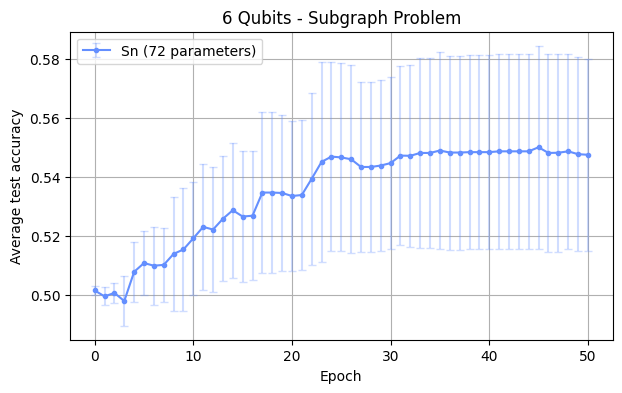

In [21]:
plot_graph("6 Qubits - Subgraph Problem", accuracies, num_epochs)